# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [147]:
!pip install citipy


In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

weather_api_key = "5e08f1ed495b51176664974c644f8be4"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [149]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [150]:

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    #city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|carnarvon
Processing record 2|tasiilaq
Processing record 3|safford
Processing record 4|la ronge
Processing record 5|punta arenas
Processing record 6|rikitea
Processing record 7|hobart
Processing record 8|half moon bay
Processing record 9|isangel
Processing record 10|mahebourg
City not found. skipping.
Processing record 11|kawalu
Processing record 12|roald
Processing record 13|puerto ayora
Processing record 14|esperance
Processing record 15|porto novo
Processing record 16|coahuayana
Processing record 17|yellowknife
Processing record 18|anahuac
Processing record 19|bluff
Processing record 20|khandyga
Processing record 21|lavrentiya
City not found. skipping.
Processing record 22|mabaruma
Processing record 23|atuona
Processing record 24|albany
Processing record 25|busselton
Processing record 26|beringovskiy
Processing record 27|cape town
Processing record 28|mirabad
Processing record 29|ponta do sol
City not found. skipping.
Processing record 30|mbuguni
Processing recor

Processing record 246|verkhniye tatyshly
Processing record 247|coquimbo
Processing record 248|toccoa
Processing record 249|hofn
Processing record 250|sambava
Processing record 251|saint george
Processing record 252|westport
Processing record 253|tornio
Processing record 254|lazaro cardenas
Processing record 255|sisimiut
Processing record 256|arya
Processing record 257|tabou
Processing record 258|port lincoln
Processing record 259|praia
Processing record 260|rio gallegos
Processing record 261|u thong
Processing record 262|thompson
Processing record 263|rawah
Processing record 264|synya
Processing record 265|sao felix do xingu
Processing record 266|manaus
Processing record 267|san quintin
Processing record 268|srednekolymsk
Processing record 269|ilulissat
Processing record 270|laguna
Processing record 271|broome
Processing record 272|upernavik
Processing record 273|tabas
City not found. skipping.
Processing record 274|cartagena
Processing record 275|estelle
Processing record 276|abha
Pro

Processing record 492|santa rita
Processing record 493|saveh
Processing record 494|kieta
Processing record 495|petropavlovsk-kamchatskiy
Processing record 496|gueugnon
Processing record 497|somerset
Processing record 498|namibe
Processing record 499|bolobo
Processing record 500|san cristobal
Processing record 501|taos
Processing record 502|cabras
Processing record 503|saint anthony
Processing record 504|lyubinskiy
Processing record 505|belaya gora
Processing record 506|luwuk
Processing record 507|belmonte
City not found. skipping.
Processing record 508|mecca
City not found. skipping.
Processing record 509|neiafu
Processing record 510|matara
Processing record 511|aberdeen
Processing record 512|kaitong
Processing record 513|parabel
Processing record 514|donskoye
Processing record 515|valparaiso
Processing record 516|takoradi
Processing record 517|ayorou
Processing record 518|hvide sande
Processing record 519|porto velho
Processing record 520|lagoa
Processing record 521|yabrud
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [157]:

#Creating city dataframe
cities_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
cities_df = city_df.rename_axis('City ID')

#Exporting data to csv
cities_df.to_csv("..\data\cities.csv")

#Displaying dataframe
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Carnarvon,40,AU,1614742236,83,-24.8667,113.6333,78.80,13.80
1,Tasiilaq,90,GL,1614742264,39,65.6145,-37.6368,26.60,18.41
2,Safford,1,US,1614742372,15,32.8340,-109.7076,57.20,11.50
3,La Ronge,91,CA,1614742340,79,55.1001,-105.2842,15.80,5.75
4,Punta Arenas,20,CL,1614742218,66,-53.1500,-70.9167,48.20,11.50
...,...,...,...,...,...,...,...,...,...
566,Saint-Joseph,0,RE,1614742644,61,-21.3667,55.6167,78.01,4.61
567,Ridgecrest,75,US,1614742644,13,35.6225,-117.6709,55.99,5.75
568,Solnechnyy,100,RU,1614742644,75,50.7214,136.6319,11.03,7.40


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [169]:
humidity

[83,
 39,
 15,
 79,
 66,
 70,
 45,
 87,
 79,
 94,
 50,
 93,
 96,
 53,
 84,
 88,
 77,
 43,
 66,
 85,
 82,
 97,
 74,
 55,
 83,
 80,
 94,
 41,
 63,
 77,
 84,
 94,
 93,
 64,
 66,
 57,
 78,
 95,
 61,
 87,
 61,
 78,
 92,
 100,
 50,
 50,
 74,
 79,
 27,
 27,
 58,
 35,
 86,
 59,
 69,
 90,
 66,
 60,
 14,
 25,
 92,
 71,
 71,
 66,
 64,
 92,
 37,
 78,
 18,
 70,
 60,
 78,
 20,
 70,
 73,
 49,
 91,
 74,
 88,
 85,
 62,
 71,
 24,
 76,
 72,
 75,
 95,
 94,
 72,
 30,
 65,
 45,
 85,
 91,
 86,
 98,
 98,
 93,
 59,
 89,
 56,
 76,
 81,
 82,
 81,
 69,
 100,
 70,
 86,
 91,
 85,
 71,
 23,
 16,
 53,
 87,
 74,
 73,
 81,
 74,
 39,
 81,
 87,
 43,
 61,
 88,
 34,
 95,
 58,
 64,
 88,
 89,
 66,
 78,
 83,
 89,
 89,
 37,
 83,
 80,
 71,
 84,
 86,
 81,
 85,
 95,
 91,
 62,
 76,
 77,
 69,
 96,
 93,
 19,
 59,
 84,
 63,
 98,
 87,
 94,
 75,
 74,
 66,
 74,
 94,
 70,
 77,
 55,
 52,
 88,
 82,
 93,
 76,
 84,
 95,
 78,
 90,
 93,
 29,
 82,
 32,
 83,
 60,
 62,
 75,
 93,
 99,
 86,
 74,
 90,
 65,
 94,
 55,
 71,
 96,
 80,
 64,
 96,
 72,
 78

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

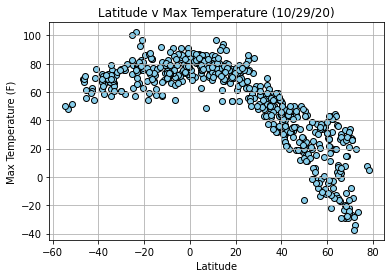

In [178]:
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('Latitude v Max Temperature (10/29/20)')
plt.grid()
plt.show()


## Latitude vs. Humidity Plot

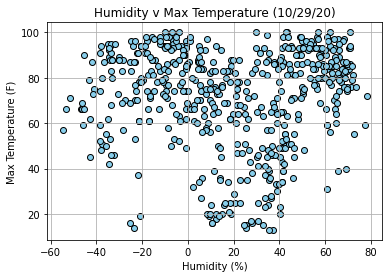

In [181]:
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Humidity (%)')
plt.title('Humidity v Max Temperature (10/29/20)')
plt.grid()

plt.show()


## Latitude vs. Cloudiness Plot

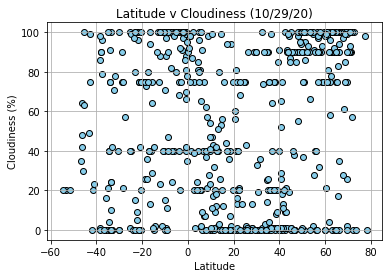

In [189]:
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude v Cloudiness (10/29/20)')
plt.grid()

## Latitude vs. Wind Speed Plot

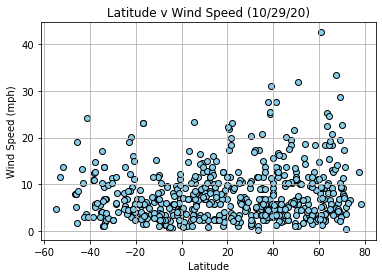

In [191]:
x_axis=cities_df['Lat']
y_axis=cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', color= "skyblue", edgecolor= "black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude v Wind Speed (10/29/20)')
plt.grid()

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


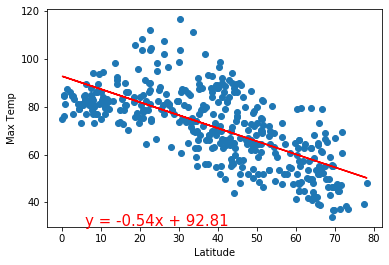

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


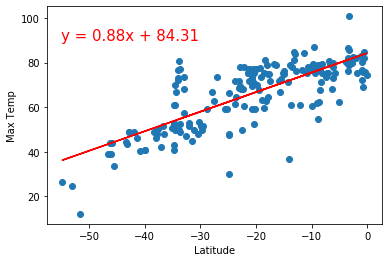

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


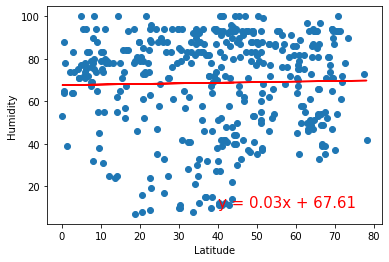

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


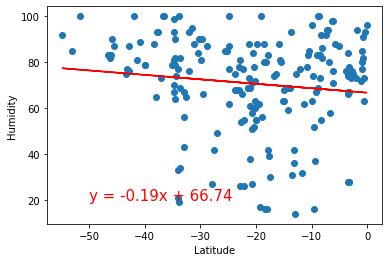

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


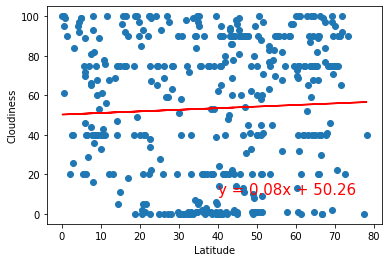

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


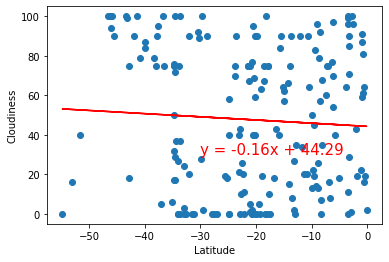

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


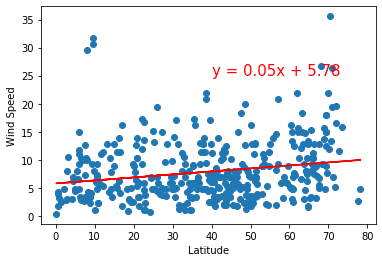

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


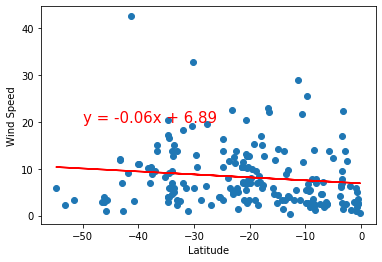